# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [4]:
# Import necessary libraries
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch Version
torch.__version__

'1.13.0+cu116'

In [5]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total. 
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [6]:
# Create the data parameters
weight = 0.3
bias = 0.9

# Create range values
start = 0
end = 1
step = 0.01

# Make X and y using linear regression feature
X = torch.arange(start, end, step).unsqueeze(dim=1)

y = weight * X + bias


print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [8]:
# Split the data into training and testing
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# Check
len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [45]:
# Plot the training and testing data 
def plot_predictions(
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    predictions = None):
  
  plt.figure(figsize=(10,7))

  # Plot train data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label = "Training Data")

  # Plot train data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label = "Testing Data")

  # Are there any predictions?
  if predictions is not None:

    # Plot train data in red
    plt.scatter(test_data, predictions, c='r', s=4, label = "Prediction Data")

  # Show the legend
  plt.legend(prop={"size": 14})

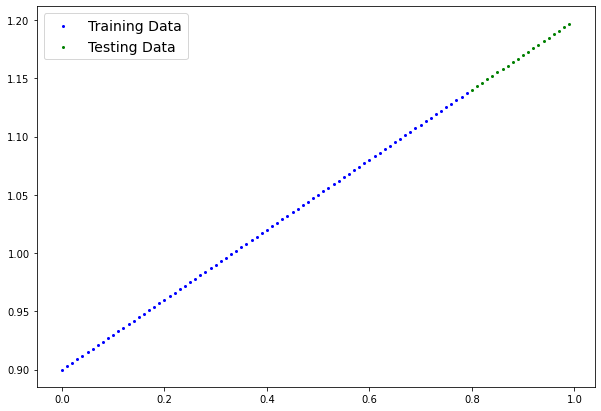

In [47]:
# Let's plot our training and test data
plot_predictions()

## 2. Build a PyTorch model by subclassing `nn.Module`. 
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`. 
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1. 
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [48]:
# Create PyTorch linear regression model by subclassing nn.Module | Initialize parameters manually
class LinearRegressionModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype = torch.float))
    
    self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype = torch.float))
    
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [49]:
# # Create PyTorch linear regression model by subclassing nn.Module | Initialize parameters using nn.Linear
# class LinearRegressionModelV2(nn.Module):
#   def __init__(self):
#     super().__init__()
    
#     # Setup parameters using nn.Linear() layer
#     linear_layer = nn.Linear(in_features=1, out_features=1)
    
#   def forward(self, x:torch.Tensor) -> torch.Tensor:
#     return self.linear_layer(x)

In [50]:
# Instantiate the model and put it to the target device modelV1
# Set the manual seed
torch.manual_seed(42)
modelV1 = LinearRegressionModelV1()
modelV1.to(device)


LinearRegressionModelV1()

In [51]:
# Check current device for modelV1
next(modelV1.parameters()).device

device(type='cpu')

In [52]:
# Let's check the model injitialized parameters using model>state_dict()
modelV1.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [53]:
# Our actual parameters values
weight, bias

(0.3, 0.9)

In [54]:
# # Instantiate the model and put it to the target device modelV2
# # Set the manual seed
# torch.manual_seed(42)
# modelV2 = LinearRegressionModelV2()
# modelV2.to(device)

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively. 
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [55]:
# Create the loss function and optimizer
# Loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params = modelV1.parameters(), lr=0.01)

In [56]:
# Training loop
torch.manual_seed(42)

# Train model for 300 epochs
epochs = 300

# Send data to target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):

  ### Training

  # Put model in train mode
  modelV1.train()

  # 1. Forward pass
  y_preds = modelV1(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_preds, y_train)

  # 3. Zero gradients
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()
  

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:

    # Put model in evaluation mode and setup inference context
    modelV1.eval()
    with torch.inference_mode():

      # 1. Forward pass
      test_preds = modelV1(X_test)
      
      # 2. Calculate test loss
      test_loss = loss_fn(test_preds, y_test)

      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 0.757 | Test loss: 0.725
Epoch: 20 | Train loss: 0.525 | Test loss: 0.454
Epoch: 40 | Train loss: 0.294 | Test loss: 0.183
Epoch: 60 | Train loss: 0.077 | Test loss: 0.073
Epoch: 80 | Train loss: 0.053 | Test loss: 0.116
Epoch: 100 | Train loss: 0.046 | Test loss: 0.105
Epoch: 120 | Train loss: 0.039 | Test loss: 0.089
Epoch: 140 | Train loss: 0.032 | Test loss: 0.074
Epoch: 160 | Train loss: 0.025 | Test loss: 0.058
Epoch: 180 | Train loss: 0.018 | Test loss: 0.042
Epoch: 200 | Train loss: 0.011 | Test loss: 0.026
Epoch: 220 | Train loss: 0.004 | Test loss: 0.009
Epoch: 240 | Train loss: 0.004 | Test loss: 0.006
Epoch: 260 | Train loss: 0.004 | Test loss: 0.006
Epoch: 280 | Train loss: 0.004 | Test loss: 0.006


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [57]:
# Make predictions with the model
modelV1.eval()
with torch.inference_mode():
  predicted_values = modelV1(X_test)

predicted_values

tensor([[1.1464],
        [1.1495],
        [1.1525],
        [1.1556],
        [1.1587],
        [1.1617],
        [1.1648],
        [1.1679],
        [1.1709],
        [1.1740],
        [1.1771],
        [1.1801],
        [1.1832],
        [1.1863],
        [1.1893],
        [1.1924],
        [1.1955],
        [1.1985],
        [1.2016],
        [1.2047]])

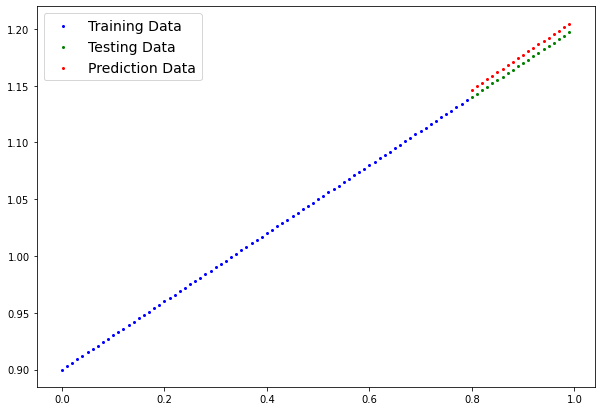

In [58]:
# Plot the predictions (these may need to be on a specific device)
plot_predictions(predictions=predicted_values)

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [66]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = ("exercise_linear_model.pth")
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
print(f"Model is going to save: {MODEL_SAVE_PATH}")

# 3. Save the model state dict
torch.save(obj=modelV1.state_dict(), f=MODEL_SAVE_PATH )

Model is going to save: Models/exercise_linear_model.pth


In [67]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)

# Create new instance
loaded_modelV1 = LinearRegressionModelV1()

# load saved state dict
loaded_modelV1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# put it on the target device
loaded_modelV1.to(device)

LinearRegressionModelV1()

In [68]:
# Check parameters that loaded into the new instance model
loaded_modelV1.state_dict()

OrderedDict([('weights', tensor([0.3067])), ('bias', tensor([0.9011]))])

In [69]:
# Make predictions with loaded model and compare them to the previous
loaded_modelV1.eval()

with torch.inference_mode():
  loaded_modelV1_preds = loaded_modelV1(X_test)

loaded_modelV1_preds

tensor([[1.1464],
        [1.1495],
        [1.1525],
        [1.1556],
        [1.1587],
        [1.1617],
        [1.1648],
        [1.1679],
        [1.1709],
        [1.1740],
        [1.1771],
        [1.1801],
        [1.1832],
        [1.1863],
        [1.1893],
        [1.1924],
        [1.1955],
        [1.1985],
        [1.2016],
        [1.2047]])

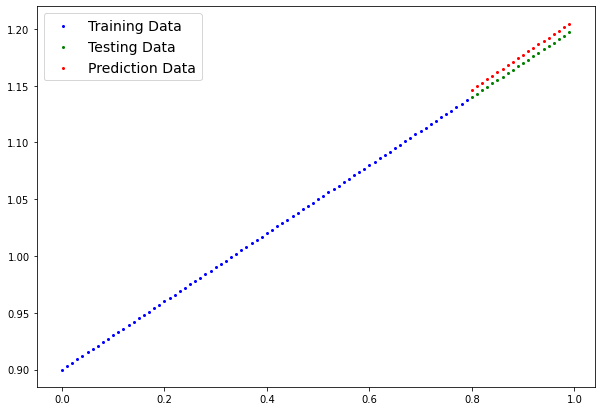

In [71]:
# Plot
plot_predictions(predictions=loaded_modelV1_preds)

In [72]:
# Let's compare
loaded_modelV1_preds == predicted_values

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])